In [1]:
#importing the libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder ,StandardScaler
from sklearn.compose import  ColumnTransformer
import numpy as np

In [2]:
#loading of the data
data=pd.read_csv("Train.csv")

In [3]:
#gives the First 5 rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

### 1.Imputation Of Missing Data

In [5]:
#Check if there are still missing values in the data
missing_data = data.isnull().sum()

In [6]:
print(missing_data)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
#finding the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [8]:
#Filling missing Item_Weight values by grouping by Item_Type and using the median 
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))

In [9]:
#Filling missing Outlet_Size values by grouping by Item_Type and using the mode 
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Item_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [10]:
# Fix inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [11]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [12]:
#Check if there are still missing values in the data
data_without = data.isnull().sum()

In [13]:
print(data_without)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###  2. Categorical Variable Encoding
#### Identify Nominal , Numeric and Ordinal Data

In [15]:
# Assuming nominal and ordinal data columns
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']  # Categorical without order
ordinal_cols = ['Outlet_Size']  # Categorical with order, e.g., Small < Medium < High
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales', 'Outlet_Establishment_Year']  # Numerical columns

# Display identified nominal and ordinal and numerical columns
print("\nNominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)
print("Numerical Columns:", numerical_columns)


Nominal Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns: ['Outlet_Size']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


#### Encoding Techniques

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert Item_Identifier and Outlet_Identifier to numeric using Label Encoding
data['Item_Identifier'] = label_encoder.fit_transform(data['Item_Identifier'])
data['Outlet_Identifier'] = label_encoder.fit_transform(data['Outlet_Identifier'])

# Display transformed columns
data[['Item_Identifier', 'Outlet_Identifier']].head()

,Item_Identifier,Outlet_Identifier
0,156,9
1,8,3
2,662,9
3,1121,0
4,1297,1


In [17]:
#finding the unique values for Outlet_Size
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [18]:
#defining mappings for Outlet_Size
map_Outlet_Size=['Medium', 'High', 'Small']

In [19]:
#applying Encoding Techniques for Columns
ohe=OneHotEncoder(sparse_output=False)      #Nominal Encoding
ode=OrdinalEncoder(categories=[map_Outlet_Size])  #Ordinal Encoding 

In [20]:
# Define the ColumnTransformer with correct transformers
ct = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to categorical columns
        ('ohe', OneHotEncoder(sparse_output=False), 
         [ 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']),
        
        # Apply OrdinalEncoder to ordinal categorical columns
        ('ode', OrdinalEncoder(), ['Outlet_Size']),
    ],
   remainder='passthrough'  # Keep any other columns as they are
)
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(sparse_output=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ode', OrdinalEncoder(), ['Outlet_Size'])])

In [21]:
# applying the transformation
df_encoded = ct.fit_transform(data)
df_encoded.head()

,ohe__Item_Fat_Content_Low Fat,ohe__Item_Fat_Content_Regular,ohe__Item_Type_Baking Goods,ohe__Item_Type_Breads,ohe__Item_Type_Breakfast,ohe__Item_Type_Canned,ohe__Item_Type_Dairy,ohe__Item_Type_Frozen Foods,ohe__Item_Type_Fruits and Vegetables,ohe__Item_Type_Hard Drinks,...,ohe__Outlet_Type_Supermarket Type2,ohe__Outlet_Type_Supermarket Type3,ode__Outlet_Size,remainder__Item_Identifier,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Identifier,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


In [22]:
# Renaming columns
new_column_names = {'remainder__Item_Identifier':'Item_Identifier' ,
       'ohe__Item_Fat_Content_Low Fat':'Item_Fat_Content_Low Fat',
       'ohe__Item_Fat_Content_Regular':'Item_Fat_Content_Regular',
       'remainder__Outlet_Identifier':'Outlet_Identifier',
       'ohe__Item_Type_Baking Goods':'Item_Type_Baking Goods', 
       'ohe__Item_Type_Breads':'Item_Type_Breads',
       'ohe__Item_Type_Breakfast':'Item_Type_Breakfast', 
       'ohe__Item_Type_Canned':'Item_Type_Canned',
       'ohe__Item_Type_Dairy':'Item_Type_Dairy',
       'ohe__Item_Type_Frozen Foods':'Item_Type_Frozen Foods',
       'ohe__Item_Type_Fruits and Vegetables':'Item_Type_Fruits and Vegetables',
        'ohe__Item_Type_Hard Drinks':'Item_Type_Hard Drinks',
       'ohe__Item_Type_Health and Hygiene':'Item_Type_Health and Hygiene', 
        'ohe__Item_Type_Household':'Item_Type_Househol',
       'ohe__Item_Type_Meat':'Item_Type_Meat', 
        'ohe__Item_Type_Others':'Item_Type_Others',
       'ohe__Item_Type_Seafood':'Item_Type_Seafood',
        'ohe__Item_Type_Snack Foods':'Item_Type_Snack Foods',
       'ohe__Item_Type_Soft Drinks':'Item_Type_Soft Drink',
       'ohe__Item_Type_Starchy Foods' :'Item_Type_Starchy Foods',
       'ohe__Outlet_Location_Type_Tier 1':'Outlet_Location_Type_Tier 1',
        'ohe__Outlet_Location_Type_Tier 2':'Outlet_Location_Type_Tier 2',
       'ohe__Outlet_Location_Type_Tier 3':'Outlet_Location_Type_Tier 3', 
        'ohe__Outlet_Type_Grocery Store':'Outlet_Type_Grocery Store',
       'ohe__Outlet_Type_Supermarket Type1':'Outlet_Type_Supermarket Type1',
       'ohe__Outlet_Type_Supermarket Type2':'Outlet_Type_Supermarket Type2',
       'ohe__Outlet_Type_Supermarket Type3':'Outlet_Type_Supermarket Type3', 
       'ode__Outlet_Size':'Outlet_Size',
       'remainder__Item_Weight': 'Item_Weight',
       'remainder__Item_Visibility':'Item_Visibility',
       'remainder__Item_Outlet_Sales':'Item_Outlet_Sales',
       'remainder__Item_MRP':'Item_MRP',
       'remainder__Outlet_Establishment_Year':'Outlet_Establishment_Year' ,
       }
# Apply the renaming
df_encoded.rename(columns=new_column_names, inplace=True)

df_encoded.head(5)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052


### 3. Feature Derivation 

In [23]:
# Creating a new column named Outlet_age for the store's age
df_encoded['Outlet_age'] = 2024 - df_encoded['Outlet_Establishment_Year']

# Deriving a new feature: sales_per_mrp
# Ensure we handle divisions by zero if 'Item_MRP' is zero
df_encoded['sales_per_mrp'] = df_encoded['Item_Outlet_Sales'] / df_encoded['Item_MRP'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero

# Display the original columns and the new feature
print(df_encoded[['Outlet_Establishment_Year', 'Outlet_age','Item_Outlet_Sales', 'Item_MRP', 'sales_per_mrp']].head())

   Outlet_Establishment_Year  Outlet_age  Item_Outlet_Sales  Item_MRP  \
0                       1999          25          3735.1380  249.8092   
1                       2009          15           443.4228   48.2692   
2                       1999          25          2097.2700  141.6180   
3                       1998          26           732.3800  182.0950   
4                       1987          37           994.7052   53.8614   

   sales_per_mrp  
0      14.951963  
1       9.186454  
2      14.809346  
3       4.021967  
4      18.467868  


In [24]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,156,9.30,0.016047,249.8092,9,1999,3735.1380,25,14.951963
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,8,5.92,0.019278,48.2692,3,2009,443.4228,15,9.186454
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,662,17.50,0.016760,141.6180,9,1999,2097.2700,25,14.809346
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1121,19.20,0.000000,182.0950,0,1998,732.3800,26,4.021967
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1297,8.93,0.000000,53.8614,1,1987,994.7052,37,18.467868


### 4. Outlier Treatment

In [25]:
# using IQR Technique
def detect_outliers_iqr(df_encoded, column):
    Q1 = df_encoded[column].quantile(0.25)
    Q3 = df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)]

# Checking for outliers in numerical columns
outliers = {}

for col in numerical_columns:
    outliers[col] = detect_outliers_iqr(df_encoded, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")


Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 144
Outliers detected in Item_MRP: 0
Outliers detected in Item_Outlet_Sales: 186
Outliers detected in Outlet_Establishment_Year: 0


In [26]:
# Treat outliers by capping at the 1st and 99th percentiles
def cap_outliers(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])

# Detect and treat outliers
outliers_info = {}
for col in numerical_columns:
    # Cap outliers
    cap_outliers(df_encoded, col)

# Display the transformed dataset and outliers summary
df_encoded.head(3),outliers_info

(   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
 0                       1.0                       0.0                     0.0   
 1                       0.0                       1.0                     0.0   
 2                       1.0                       0.0                     0.0   
 
    Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
 0               0.0                  0.0               0.0              1.0   
 1               0.0                  0.0               0.0              0.0   
 2               0.0                  0.0               0.0              0.0   
 
    Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
 0                     0.0                              0.0   
 1                     0.0                              0.0   
 2                     0.0                              0.0   
 
    Item_Type_Hard Drinks  ...  Outlet_Size  Item_Identifier  Item_Weight  \
 0               

In [27]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,156,9.30,0.016047,249.8092,9,1999.0,3735.1380,25,14.951963
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,8,5.92,0.019278,48.2692,3,2009.0,443.4228,15,9.186454
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,662,17.50,0.016760,141.6180,9,1999.0,2097.2700,25,14.809346
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1121,19.20,0.000000,182.0950,0,1998.0,732.3800,26,4.021967
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1297,8.93,0.000000,53.8614,1,1987.0,994.7052,37,18.467868


### 5. Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to relevant numerical columns
df_encoded[['Item_Weight', 'Item_MRP']] = scaler.fit_transform(df_encoded[['Item_Weight', 'Item_MRP']])

# Display the scaled dataframe
print(df_encoded[['Item_Weight', 'Item_MRP']].head())

   Item_Weight  Item_MRP
0     0.263158  0.942036
1     0.047528  0.057933
2     0.786284  0.467430
3     0.894737  0.644992
4     0.239553  0.082465


### 6. Target Variable Transformation

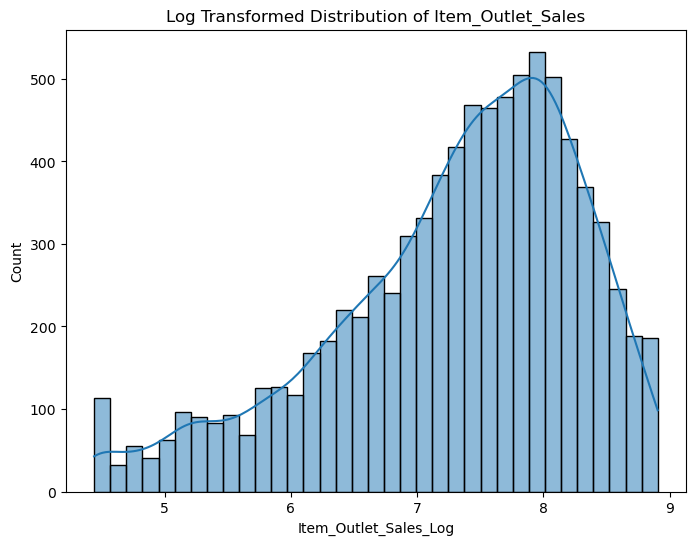

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#Target Variable Transformation - Apply Log Transformation (if there are no zeros)
df_encoded['Item_Outlet_Sales_Log'] = np.log1p(df_encoded['Item_Outlet_Sales'])  # log1p handles zero values safely

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Item_Outlet_Sales_Log'], kde=True)
#sns.histplot(df_encoded['Item_Visibility_Log'], kde=True)
plt.title('Log Transformed Distribution of Item_Outlet_Sales')
plt.show()

In [30]:
#printing the datatype of an Each Column
df_encoded.dtypes

Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Househol                 float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drink               float64
Item_Type_Starchy Foods            float64
Outlet_Location_Type_Tier 1        float64
Outlet_Location_Type_Tier 2        float64
Outlet_Location_Type_Tier 3        float64
Outlet_Type_Grocery Store          float64
Outlet_Type_Supermarket Type1      float64
Outlet_Type

In [31]:
df_encoded.shape

(8523, 36)

In [32]:
df_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp,Item_Outlet_Sales_Log
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,156,0.263158,0.016047,0.942036,9,1999.0,3735.1380,25,14.951963,8.225808
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,0.047528,0.019278,0.057933,3,2009.0,443.4228,15,9.186454,6.096776
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662,0.786284,0.016760,0.467430,9,1999.0,2097.2700,25,14.809346,7.648868
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1121,0.894737,0.000000,0.644992,0,1998.0,732.3800,26,4.021967,6.597664
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1297,0.239553,0.000000,0.082465,1,1987.0,994.7052,37,18.467868,6.903451
